## plotcc.m
From A First Course in Machine Learning, Chapter 5.

Simon Rogers, 17/10/17 [simon.rogers@glasgow.ac.uk]

Computing and plotting class-conditional densities for a Bayes classifier

In [111]:
import numpy as np
import pylab as plt
%matplotlib inline

In [112]:
X = []
t = []
with open('bdata.csv','r') as f:
    reader = csv.reader(f)
    for line in reader:
        X.append([float(line[0]),float(line[1])])
        t.append(float(line[2]))
        
t = [int(i) for i in t]
t = np.array(t)[:,None]
X = np.array(X)


Plot the data

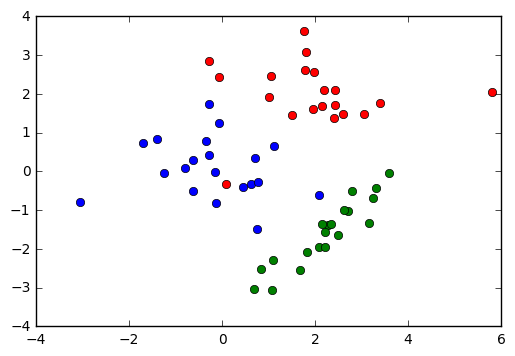

In [113]:
cols = {1:'r',2:'b',3:'g'}
for label in cols:
    pos = np.where(t==label)[0]
    plt.plot(X[pos,0],X[pos,1],cols[label]+'o')

A method to compute the mean and covariance of the samples

In [114]:
def compute_cc(data):
    mu = data.mean(axis=0)
    cov = np.cov(data.T)
    return mu,cov

Compute means and covariances for each class

In [115]:
cc_pars = {}
for label in cols:
    pos = np.where(t == label)[0]
    mu,cov = compute_cc(X[pos,:])
    cc_pars[label] = (mu,cov)

Plot the data and the contours

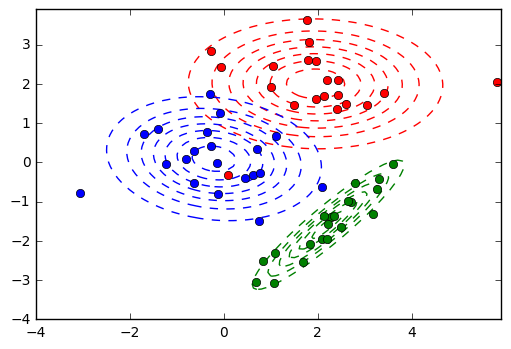

In [116]:
minx = np.floor(X.min(axis=0))
maxx = np.ceil(X.max(axis=0))

xr = np.arange(minx[0],maxx[0],0.1)
yr = np.arange(minx[1],maxx[1],0.1)
_xx,_yy = np.meshgrid(xr,yr)

for label in cols:
    z = np.zeros_like(_xx.ravel())
    for i,x in enumerate(_xx.ravel()):
        y = _yy.ravel()[i]

        z[i] = -0.5*np.linalg.det(2*np.pi*cc_pars[label][1])
        tempX = np.array([x,y]).T
        inner = np.dot((tempX-cc_pars[label][0]).T,np.linalg.inv(cc_pars[label][1]))
        inner = np.dot(inner,(tempX-cc_pars[label][0]))
        z[i] *= np.exp(-0.5*inner)
        
    # plot the data
    pos = np.where(t == label)[0]
    plt.plot(X[pos,0],X[pos,1],cols[label] + 'o')

    # plot the contour
    _zz = np.reshape(z,(len(yr),len(xr)))
    plt.contour(_xx,_yy,_zz,colors=cols[label])